# LVIT Test

# Instructions

## Before Using this Program
#### First trial after connecting LVIT: "Test_VMeasurement"
Upload the Arduino file "Test_VMeasurement.ino" on the Arduino software. Wait to see if data is recorded, then Close out the program.
    Subsequent trials can ignore this step.

#### First trial of each day: "LVIT Calibration Test"
Use python file "LVIT Calibration Test". Replace the port name with the port the LVIT is attached to. Replace the heights with the values of the calibration blocks. Run the program and place the corresponding block when prompted. Shut down the Kernel.  

## Main Recording Program: "LVIT Test"
Use python file "LVIT Test". Replace the port name with the port the LVIT is attached to. Input y-intercept and slope from Calibration Test. Replace minutes with how many minutes will be used. 

In [1]:
import serial
import time
from datetime import datetime
import pdb
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
def closest_value(input_list, input_value):
 
  arr = np.asarray(input_list)
 
  i = (np.abs(arr - input_value)).argmin()
 
  return arr[i]

## Calibration

In [3]:
#Set Port for LVIT
serialPortName = 'COM3'
serialPort = serial.Serial(
    port=serialPortName, baudrate=9600, bytesize=8, timeout=2, stopbits=serial.STOPBITS_ONE
)

In [4]:
#Copy and Pase Calibration Data from end of Calibration Script

Slope = 0.065
Intercept = 5.539

In [5]:
#Set List of Brands

brands = ['A',brand_index]
brandnames = ['Arctic Gel', sample_brand]

# Ask for the brand
sample_brand = input("What is the Sample Brand Name?").capitalize()
brand = sample_brand[0]

#Ask for which expirement run?
#experiment = input("What number setup is this? (#)")
date_tested = datetime.now()
experiment = date_tested.strftime("%m-%d-%y")

# Ask for the batch number
batch_number = input("What is the batch number? ")

# Ask for the run number
run_number = input("What is the run number? ")

#Create a reference for later calculation
initial_mass = input("Input Initial Mass of the Full Test Cell+SAP:")

#Create Filenames
filename = f"{brand}_{batch_number}_{run_number}_{experiment}.csv"
full_filename = f"{brand}_{batch_number}_{run_number}_{experiment}_original.csv"

print(filename)
print(full_filename)

start_statement = input("Press Enter to Begin Recording")
    


Which brand is it from the list (A, L)? L
In List
What is the batch number? NA
What is the run number? 3b
Input Initial Mass of the Full Test Cell+SAP:55.7008
L_NA_3b_03-01-24.csv
L_NA_3b_03-01-24_original.csv


## Main Testing Loop

In [6]:
serialString = ""  # Used to hold data coming over UART

# Get timestamps for the file name and Loop
time_start = time.time()
now = datetime.now()
current_time = now.strftime("%m-%d-%y_%H-%M-%S")

time_last_log = time.time()
time_now = time.time()
time_elapsed = time_now - time_start

# Open output data file
output_filename = f"{brand}_{batch_number}_{experiment}_{run_number}_Scale_Output_Data_{current_time}.csv"
#output_filename = 'Test1'
f = open(output_filename, "w")
#LVIT Run Time
minutes = 30
duration = 60 * minutes



# Main Loop
while time_elapsed < duration + 1:
  
  time_now = time.time()
  time_elapsed = time_now - time_start

  # Wait until there is data waiting in the serial buffer
  if serialPort.in_waiting > 0:

    # Read data out of the buffer until a carraige return / new line is found
    serialString = serialPort.readline(16)
    serial_output = serialString.decode("Ascii")

    # it's time to log another weight value.
    time_since_last_log = time_now - time_last_log

    if time_since_last_log >= .995:
      # Reformat output from '  -23.8g\n' to '-23.8'
      weight = serial_output
      
      weight = weight.replace("g\n", "")
      
      
      # Print the contents of the serial data to the file
      try:
        output = "{0},{1}\n".format(round(time_elapsed, 3), weight)
        print(output)
        weight = weight.replace("Voltage: ","")
        output = output.replace("Voltage: ","")
        output = output.replace("V","")
        f.write(output)
      except:
        pass
      time_last_log = time_now
    
   

f.close()

final_mass = input("Input Final Mass of the Full Test Cell+SAP:")

1.019,4.05670


2.02,4.03715


3.037,4.06647


4.054,4.03715


5.069,4.04692


6.079,4.05670


7.082,4.03715


8.092,4.04692


9.108,4.02737


10.124,3.99804


11.143,4.01760


12.142,3.99804


13.161,4.00782


14.178,4.01760


15.194,3.99804


16.202,3.98827


17.214,3.98827


18.22,3.98827


19.231,3.95894


20.249,3.93939


21.266,3.97849


22.268,3.95894


23.286,3.95894


24.302,3.94917


25.305,3.95894


26.321,3.94917


27.339,3.94917


28.356,3.92962


29.357,3.94917


30.375,3.93939


31.393,3.91984


32.393,3.92962


33.41,3.91984


34.428,3.90029


35.444,3.90029


36.446,3.91007


37.466,3.90029


38.481,3.89052


39.483,3.89052


40.5,3.91007


41.517,3.90029


42.518,3.87097


43.536,3.87097


44.555,3.86119


45.555,3.85142


46.573,3.85142


47.589,3.86119


48.606,3.86119


49.607,3.86119


50.626,3.84164


51.642,3.82209


52.643,3.83187


53.659,3.83187


54.678,3.82209


55.679,3.82209


56.696,3.82209


57.715,3.80254


58.73,3.82209


59.733,3.80254


60.75,3.8220

## Data Reading

In [7]:
#Initialize Variables
Time = []
position = []
position_og = []
voltage = []

print(output_filename)

#Use file from Main Loop to set time, voltage, and position lists.
with open(output_filename, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # skip header row
    for row in csv_reader:
        if row == []:
            continue
        if row[0] == '' or row[1] == '' or row == '':
            continue
        Time.append(float(row[0]))
        voltage.append(float(row[1]))
    

    

L_NA_03-01-24_3b_Scale_Output_Data_03-01-24_12-03-54.csv


## Data Manipulation

### Positional Data

In [8]:
#Use slope and y-intercept from Calibration Data to transform Voltage to Position.
position = [(i - Intercept)  / Slope for i in voltage] #Converts from Voltage to mm
position = [-i + max(position) for i in position] #Flip data to reflect movement of polymer and set zero point.

#Set Lists for the unmanipulated variables.    
position_og = position
time_og = Time

#Subtract initial manual movement.
position = position[position.index(min(position)):]
Time = Time[:len(position)]

displacement = max(position) - min(position)
print('Total Displacement:',displacement, 'mm\n')


Total Displacement: 14.888307692307684 mm



#### Velocity Appx.

In [9]:
#Calculate the change in position and time.
dP = [i - position[0] for i in position[1:]]
dTp = [i - Time[0] for i in Time[1:]]

# Calculate velocity (change in position over change in time)
velocity = [dP[i]/dTp[i]  for i in range(len(dP))]
velocity = [0] + velocity

max_velocity = max(velocity)
print('Max Velocity: ',max_velocity,' mm/s')

Max Velocity:  0.4435367975191009  mm/s


### Mass Data

In [10]:
#Develop Area to use in approximating volume.
radius = 30 #in cm
area = np.pi*radius**2

#Use area and positional data to create mass data.
mass_og = [area*i*0.001 for i in position_og]
mass_calc = [area*i*0.001 for i in position]
Tm = Time

#Use the measured mass data to fit the calculated mass data from the LVIT.
ratio = (float(final_mass)-float(initial_mass))/(max(mass_calc)-min(mass_calc))
mass = [ratio*i for i in mass_calc]
absorption = max(mass) - min(mass)
print('Total Absorption:',absorption, 'cc')

Total Absorption: 44.75 cc


#### Rate Appx.

In [11]:
#Calculate the change in mass and time.
dM = [i - mass[0] for i in mass[1:]]
dTm = [i - Tm[0] for i in Tm[1:]]

# Calculate mass_rate (change in mass over change in time)
mass_rate = [dM[i]/dTm[i]  for i in range(len(dM))]
mass_rate = [0] + mass_rate
TV = Time[:len(mass_rate)]

max_rate = max(mass_rate)
print('Max Mass Change Rate: ',max_rate,' cc/s')

Max Mass Change Rate:  1.3331449147329713  cc/s


#### T-20 appx.

In [12]:
M20 = closest_value(mass,20)
T20 = Time[mass.index(M20)]
print("T-20 = ",T20," , occurs when Mass = ",M20)

T-20 =  117.446  , occurs when Mass =  19.889043028086068


### Noise appx.

In [13]:
P3 = position[1500:]
std_P = np.std(P3)
print(round(std_P,4))

0.2037


# Plots (Position, Velocity, Mass, Mass Rate)

Text(0.5, 1.0, 'CC Rate vs Time')

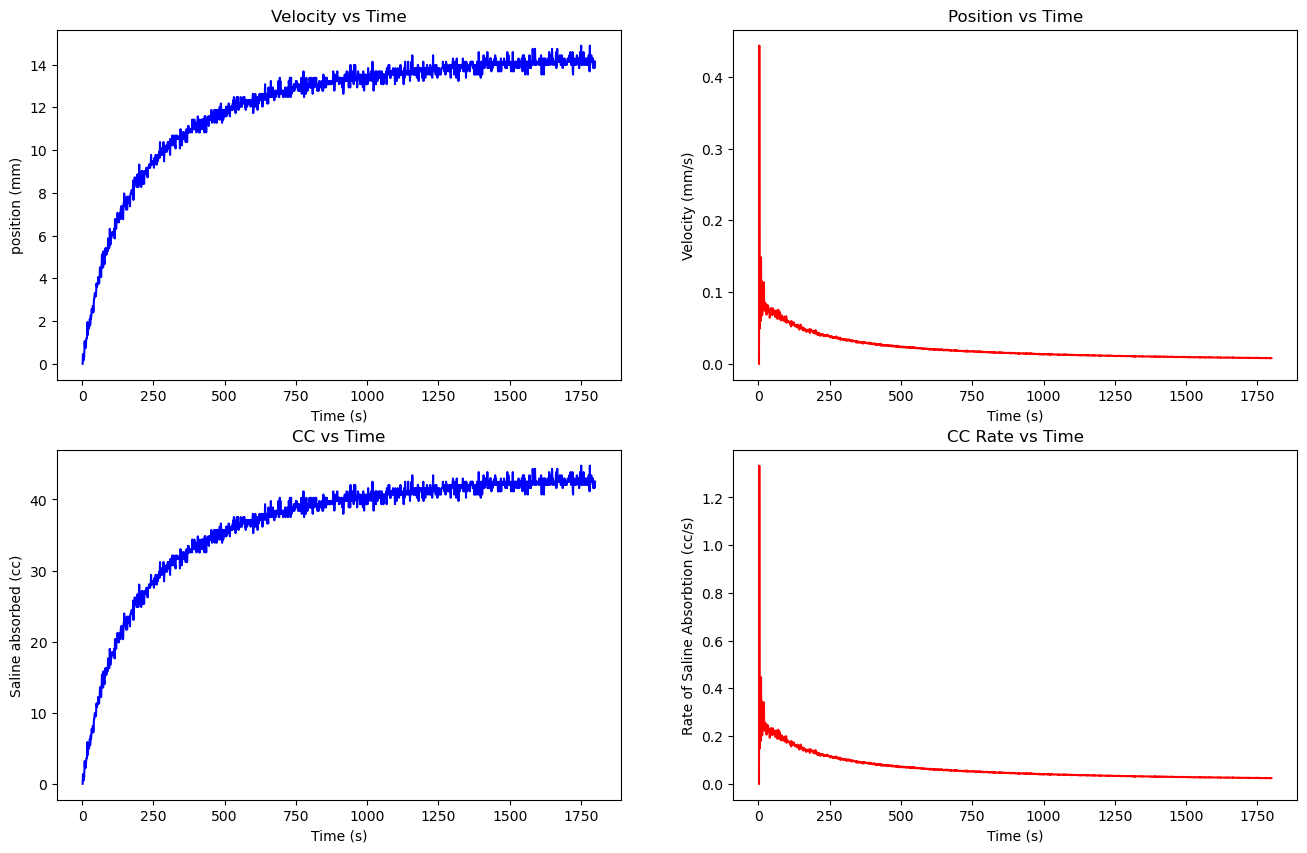

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs = axs.flatten()

axs[0].plot(Time, position,'b')
axs[1].plot(TV, velocity,'r')
axs[2].plot(Time, mass,'b')
axs[3].plot(TV, mass_rate,'r')

axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
axs[2].set_xlabel('Time (s)')
axs[3].set_xlabel('Time (s)')

axs[0].set_ylabel('position (mm)')
axs[1].set_ylabel('Velocity (mm/s)')
axs[2].set_ylabel('Saline absorbed (cc)')
axs[3].set_ylabel('Rate of Saline Absorbtion (cc/s)')

axs[1].set_title('Position vs Time')
axs[0].set_title('Velocity vs Time')
axs[2].set_title('CC vs Time')
axs[3].set_title('CC Rate vs Time')


# Save Data

#### File 1: Time, Position, Mass, Mass Calculated by LVIT

#### File 2: Full Time, Voltage, Full Position, Full Mass


In [15]:
# Writing data to CSV files

with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(Time)):
        writer.writerow([Time[i], position[i], mass[i], mass_calc[i]])

with open(full_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(Time)):
        writer.writerow([time_og[i], voltage[i], position_og[i], mass_og[i]])

print(filename,'written')
print(full_filename,'written')


L_NA_3b_03-01-24.csv written
L_NA_3b_03-01-24_original.csv written
